In [1]:
import numpy as np
import matplotlib as pl
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import misc
import scipy 

%matplotlib inline

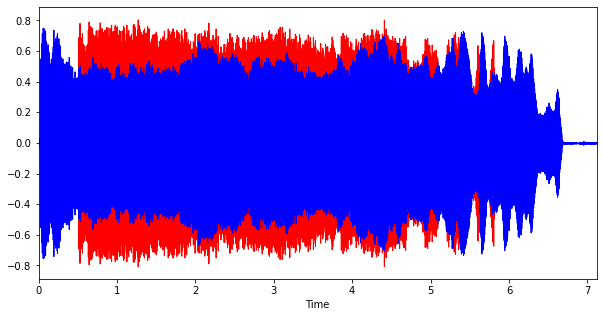

In [2]:
ton_bez, s_bez = librosa.load('../audio/maskoff_tone.wav', 16000, mono = True)
ton_s, s_s = librosa.load('../audio/maskon_tone.wav', 16000, mono = True)

plt.figure(figsize = (10,5))
librosa.display.waveplot(ton_bez, sr=s_bez, color = 'r')
librosa.display.waveplot(ton_s, sr=s_s, color = 'b')

In [3]:
#nahravani waw souboru. Nahravam 1.01 sekund pro dalsi vyuziti
ton_bez, s_bez = librosa.load('../audio/maskoff_tone.wav', 16000, mono = True, offset = 2.6, duration = 1.01)
print(s_bez)
print(librosa.get_duration(ton_bez, s_bez, 16000, ))
ton_s, s_s = librosa.load('../audio/maskon_tone.wav', 16000, mono = True, offset = 1.2, duration = 1.01)
print(s_s)
print(librosa.get_duration(ton_s, s_s, 16000, ))

16000
1.01
16000
1.01


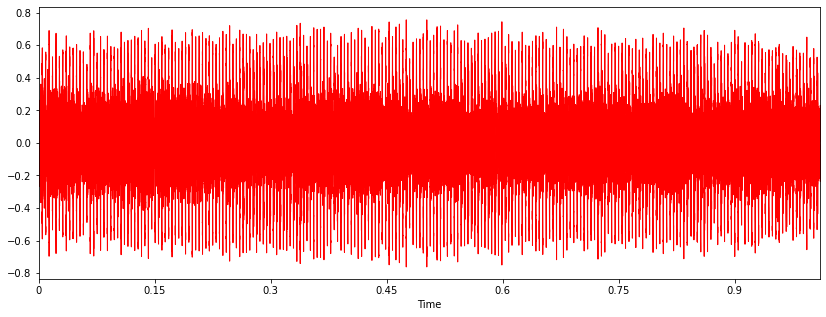

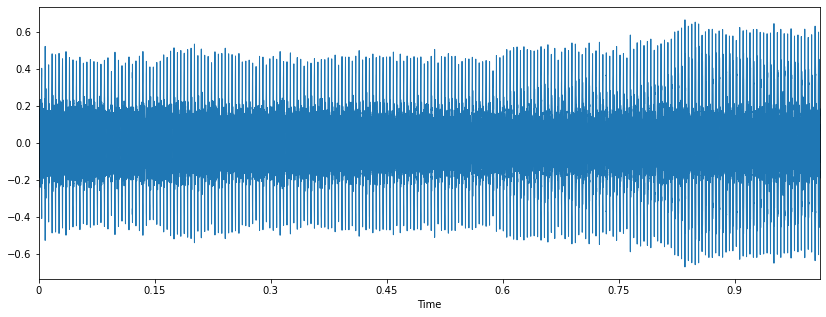

In [4]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(ton_bez, sr=s_bez, color ='r')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(ton_s, sr=s_s)

In [5]:
ton_bez -= np.mean(ton_bez)   # ustredneni
ton_s -= np.mean(ton_s)

ton_bez /= np.abs(ton_bez).max()  # normalizace
ton_s /= np.abs(ton_s).max()

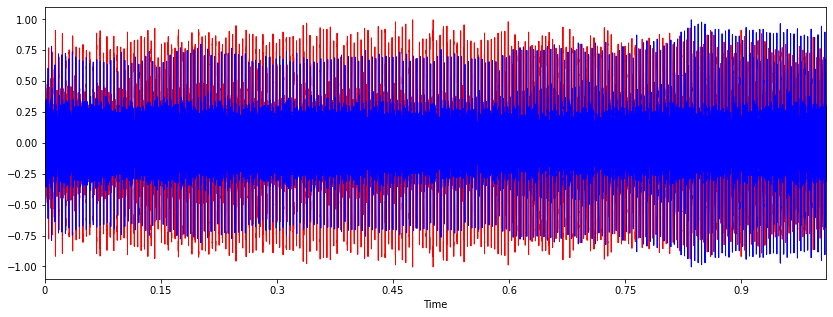

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(ton_bez, sr=s_bez, color = 'r')
librosa.display.waveplot(ton_s, sr=s_s, color = 'b')

In [7]:
#zdroj https://superkogito.github.io/blog/SignalFraming.html
#neni moje
def framing(sig, fs=16000, win_len=0.025, win_hop=0.01):
     """
     transform a signal into a series of overlapping frames.

     Args:
         sig            (array) : a mono audio signal (Nx1) from which to compute features.
         fs               (int) : the sampling frequency of the signal we are working with.
                                  Default is 16000.
         win_len        (float) : window length in sec.
                                  Default is 0.025.
         win_hop        (float) : step between successive windows in sec.
                                  Default is 0.01.

     Returns:
         array of frames.
         frame length.
     """
     # compute frame length and frame step (convert from seconds to samples)
     frame_length = win_len * fs
     frame_step = win_hop * fs
     signal_length = len(sig)
     frames_overlap = frame_length - frame_step

     # Make sure that we have at least 1 frame+
     num_frames = np.abs(signal_length - frames_overlap) // np.abs(frame_length - frames_overlap)
     rest_samples = np.abs(signal_length - frames_overlap) % np.abs(frame_length - frames_overlap)

     # Pad Signal to make sure that all frames have equal number of samples
     # without truncating any samples from the original signal
     if rest_samples != 0:
         pad_signal_length = int(frame_step - rest_samples)
         z = np.zeros((pad_signal_length))
         pad_signal = np.append(sig, z)
         num_frames += 1
     else:
         pad_signal = sig

     # make sure to use integers as indices
     frame_length = int(frame_length)
     frame_step = int(frame_step)
     num_frames = int(num_frames)

     # compute indices
     idx1 = np.tile(np.arange(0, frame_length), (num_frames, 1))
     idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                    (frame_length, 1)).T
     indices = idx1 + idx2
     frames = pad_signal[indices.astype(np.int32, copy=False)]
     return frames

In [8]:
#tady delam frames ze signalu
frames_bez  = framing(ton_bez, 16000, 0.020, 0.010)
frames_s  = framing(ton_s, 16000, 0.020, 0.010)
print(len(frames_bez))
print(frames_bez)

print(len(frames_s))
print(frames_s)

100
[[-0.350286   -0.29345164 -0.22266005 ...  0.4184061   0.29854307
   0.3918995 ]
 [ 0.2431969   0.15655763  0.1480707  ... -0.07037769  0.03532704
   0.06380457]
 [ 0.13471682  0.36973688  0.23470995 ... -0.5053035  -0.30041015
  -0.33886284]
 ...
 [-0.48684138 -0.5692171  -0.63425684 ...  0.1731293   0.2771447
   0.2671695 ]
 [ 0.36016393  0.38928503  0.30582333 ...  0.14614001  0.19336122
   0.07788244]
 [ 0.20229062  0.32456702  0.0860476  ... -0.09137382 -0.22040759
  -0.30781108]]
100
[[ 0.23165272  0.17000616  0.18489265 ...  0.2081357   0.14575851
   0.06707922]
 [ 0.11552885  0.1337945   0.08169174 ... -0.29932973 -0.3137596
  -0.30905616]
 [-0.00771862 -0.01758207  0.00844648 ... -0.0815575  -0.03625869
   0.06575496]
 ...
 [ 0.05264936  0.00652859 -0.03356451 ... -0.837664   -0.92497385
  -0.9119596 ]
 [-0.15188026 -0.156675   -0.09434346 ...  0.12840614  0.05621116
  -0.02146352]
 [-0.6998497  -0.47796777 -0.311796   ...  0.1478134   0.14306432
   0.07406583]]


In [9]:
#testovaci vypis dvou frames, skutecne se jejich pulky prekryvaji
print(frames_bez[5])
print('---------------------')
print(frames_bez[6])

[-0.00670547  0.0343617   0.2081631   0.15494874  0.15333985  0.2641126
  0.24585158  0.28249428  0.33570865  0.27207664  0.05302494  0.2142367
  0.14360599  0.18238048  0.15108739  0.18785074  0.14626068  0.3254921
  0.38445833  0.2973766   0.418205    0.2753749   0.27115154  0.19392434
  0.13725084 -0.08224332 -0.09378718 -0.21988471 -0.23134811 -0.11249064
 -0.14663954 -0.18199511 -0.07966908 -0.00183855 -0.0065848   0.08170357
  0.01610068 -0.0371539  -0.06341919 -0.12202337 -0.2325548  -0.215782
 -0.37783843 -0.4814918  -0.45088246 -0.62251186 -0.6048944  -0.7518674
 -0.691051   -0.45615163 -0.38479692 -0.18899383 -0.27080637 -0.1118873
 -0.18030576  0.02313962  0.18302405  0.05033003  0.12715499 -0.00839482
  0.21282892  0.22634368  0.25522342  0.18994232  0.19078699  0.21057646
  0.08773695  0.14300266  0.1899021   0.03532704  0.09429321  0.07623332
  0.06018454  0.18821275  0.06106944  0.13664751  0.00202281  0.23410662
  0.10221705  0.20892733  0.2154836   0.05157693  0.203095

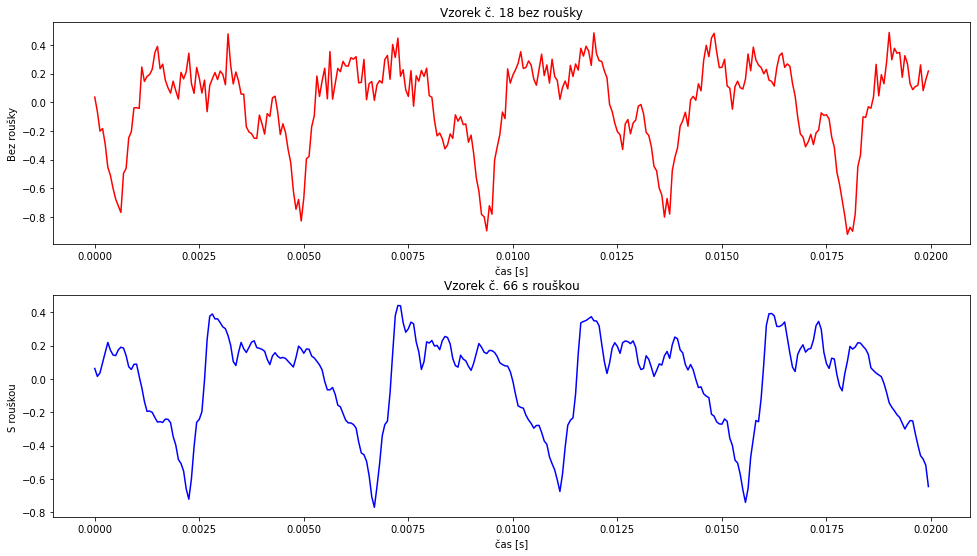

In [10]:
fig_1 = plt.figure(2, figsize=(14,8))
bez = fig_1.add_subplot(211)
s = fig_1.add_subplot(212)
fig_1.tight_layout(pad=3.0)
bez.set_title('Vzorek č. 18 bez roušky')
s.set_title('Vzorek č. 66 s rouškou')

format = np.arange(320)/16000
bez.plot(format, frames_bez[18], color = 'r')

bez.set_xlabel('čas [s]')
bez.set_ylabel('Bez roušky')

s.plot(format, frames_s[66], color = 'b')

s.set_xlabel('čas [s]')
s.set_ylabel('S rouškou')

plt.show()

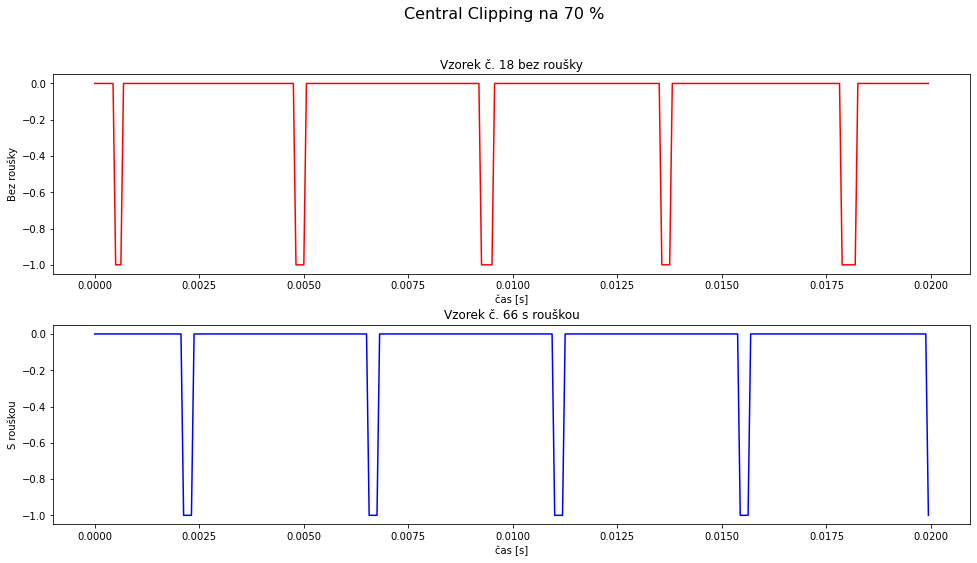

In [11]:
# clipping
#//////////////////////

# nastaveni maxima
arr_max_bez = np.empty([100])
arr_max_s = np.empty([100])
frames_bez_clipped = np.empty([320,320])
frames_s_clipped = np.empty([320,320])
x = 0
for x in range(100):
    arr_max_bez[x] = (np.max(np.absolute(frames_bez[x])))
    arr_max_s[x] = (np.max(np.abs(frames_s[x])))

# klipovani samotne
y = 0
for y in range(100):
    prah = (arr_max_bez[y]/100)*70    # tady delam 70 %
    for z in range(320):
        help2 = frames_bez[y,z]
        if prah < help2 :
           frames_bez_clipped[y,z] = 1
        elif -prah > frames_bez[y,z] :
           frames_bez_clipped[y,z] = -1
        else:
            frames_bez_clipped[y,z] = 0
            
y = 0
for y in range(100):
    prah = (arr_max_s[y]/100)*70
    for z in range(320):
        help2 = frames_s[y,z]
        if prah < help2 :
           frames_s_clipped[y,z] = 1
        elif -prah > frames_s[y,z] :
           frames_s_clipped[y,z] = -1
        else:
            frames_s_clipped[y,z] = 0
            
# kresleni grafu            

fig_2 = plt.figure(2, figsize=(14,8))
fig_2.suptitle('Central Clipping na 70 %', fontsize=16)
bez = fig_2.add_subplot(211)
s = fig_2.add_subplot(212)
fig_2.tight_layout(pad=3.0)
bez.set_title('Vzorek č. 18 bez roušky')
s.set_title('Vzorek č. 66 s rouškou')

format = np.arange(320)/16000
bez.plot(format, frames_bez_clipped[18], color = 'r')

bez.set_xlabel('čas [s]')
bez.set_ylabel('Bez roušky')

s.plot(format, frames_s_clipped[66], color = 'b')

s.set_xlabel('čas [s]')
s.set_ylabel('S rouškou')

plt.show()


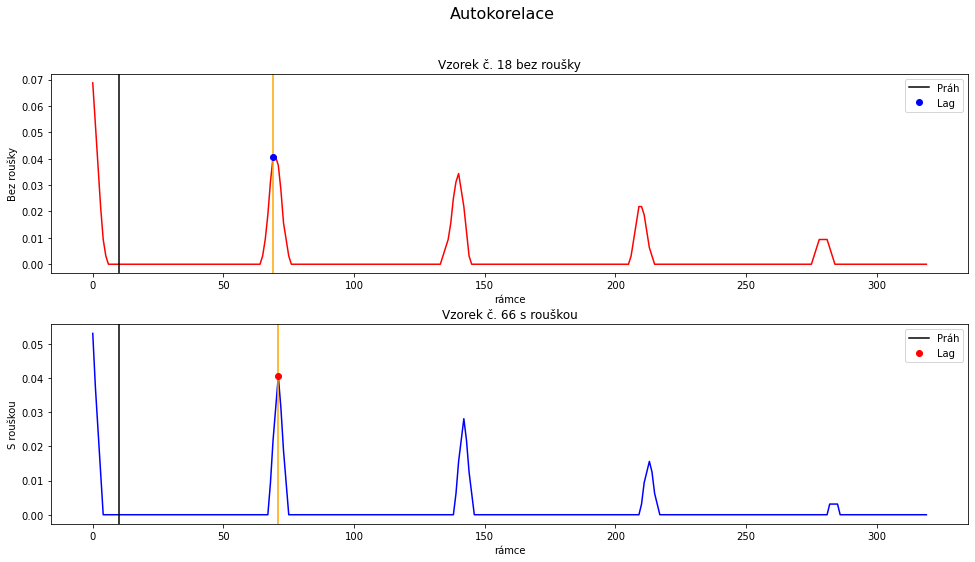

In [12]:
# korelace
# R[k] = (1/n) * x[n] * x[n+k]
# R[k] = x[n] * x[-n]

frames_bez_clip_korel = np.empty([101, 320])
frames_s_clip_korel = np.empty([101, 320])

N = 320
def korel(x):
    return np.array([np.sum(x[:-k if k else None] * x[k:]) for k in range (N)])/N

i = 0
for i in range(100):
    frames_bez_clip_korel[i] = korel(frames_bez_clipped[i])
    frames_s_clip_korel[i] = korel(frames_s_clipped[i])
      
prah = 10

lag_bez = [0] * 100
lag_s = [0] * 100
lag_bez_arg = [0] * 100
lag_s_arg = [0] * 100
i = 0
j = prah
for i in range(100):
    for j in range(prah,320):
        help_1 = frames_bez_clip_korel[i,j]
        if help_1 > lag_bez[i]:
            lag_bez[i] = j
        help_2 = frames_s_clip_korel[i, j]
        if help_2 > lag_s[i]:
            lag_s[i] = j

for i in range(100):
    lag_s_arg[i] = np.argmax(frames_s_clip_korel[i,prah:320])
    lag_bez_arg[i] = np.argmax(frames_bez_clip_korel[i,prah:320])
    lag_s[i] = np.max(frames_s_clip_korel[i,prah:320])
    lag_bez[i] = np.max(frames_bez_clip_korel[i,prah:320]) 
             
figure_korelace = plt.figure(2, figsize=(14,8))
figure_korelace.suptitle('Autokorelace', fontsize=16)
bez = figure_korelace.add_subplot(211)
s = figure_korelace.add_subplot(212)
figure_korelace.tight_layout(pad=3.0)
bez.set_title('Vzorek č. 18 bez roušky')
s.set_title('Vzorek č. 66 s rouškou')
bez.plot(frames_bez_clip_korel[18], color = 'r')
s.plot(frames_s_clip_korel[66], color = 'b')

bez.set_xlabel('rámce')
bez.set_ylabel('Bez roušky')
s.set_xlabel('rámce')
s.set_ylabel('S rouškou')

bez.axvline(x=prah, color = 'k', label='Práh'); bez.legend();
bez.axvline(x=lag_bez_arg[18]+prah, color = 'orange')
s.axvline(x=lag_s_arg[66]+prah, color = 'orange')
s.axvline(x=prah, color = 'k', label='Práh'); bez.legend();

bez.plot(lag_bez_arg[18]+prah, lag_bez[18], 'bo',label='Lag'); bez.legend();
s.plot(lag_s_arg[66]+prah,lag_s[66],'ro',label='Lag'); s.legend();
plt.show()


[225.35211268 225.35211268 225.35211268 225.35211268 225.35211268
 225.35211268 225.35211268 225.35211268 228.57142857 225.35211268
 228.57142857 228.57142857 228.57142857 228.57142857 228.57142857
 228.57142857 228.57142857 228.57142857 231.88405797 228.57142857
 228.57142857 228.57142857 228.57142857 228.57142857 231.88405797
 228.57142857 231.88405797 228.57142857 231.88405797 228.57142857
 228.57142857 231.88405797 231.88405797 228.57142857 228.57142857
 228.57142857 228.57142857 225.35211268 225.35211268 225.35211268
 225.35211268 225.35211268 225.35211268 225.35211268 225.35211268
 225.35211268 225.35211268 225.35211268 225.35211268 225.35211268
 225.35211268 225.35211268 225.35211268 225.35211268 228.57142857
 228.57142857 228.57142857 228.57142857 228.57142857 228.57142857
 228.57142857 228.57142857 225.35211268 225.35211268 225.35211268
 225.35211268 225.35211268 225.35211268 225.35211268 225.35211268
 222.22222222 225.35211268 225.35211268 225.35211268 225.35211268
 225.35211

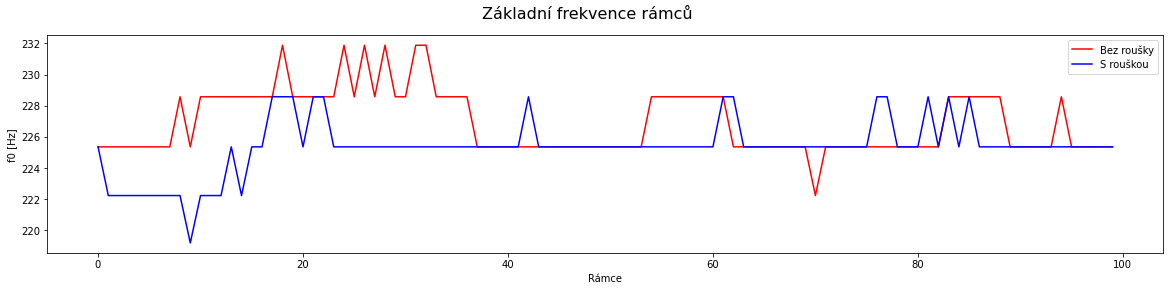

In [13]:
# lag_bez[18]
# lag_s[66]

# preved lagy na frekv
lag_s_frek = np.empty([100])
lag_bez_frek = np.empty([100])

for i in range(100):
    lag_s_frek[i] = 1/((lag_s_arg[i]+prah))*16000
    lag_bez_frek[i] = 1/((lag_bez_arg[i]+prah))*16000

print(lag_bez_frek)
print(lag_s_frek)


figure_frekv = plt.figure(1, figsize=(20,4))
figure_frekv.suptitle('Základní frekvence rámců', fontsize=16)
fig = figure_frekv.add_subplot(111)
fig.set_ylabel('f0 [Hz]')
fig.set_xlabel('Rámce')
fig.plot(lag_bez_frek, color = 'r',label='Bez roušky'); fig.legend();
fig.plot(lag_s_frek, color = 'b', label='S rouškou'); fig.legend();
plt.show()



In [14]:
odchylka_bez = np.std(lag_bez_frek)
rozptyl_bez = odchylka_bez*odchylka_bez
median_bez = np.median(lag_bez_frek)
print("Rozptyl bez rousky je: ", rozptyl_bez)
print("Median bez rousky je: ", median_bez)

odchylka_s = np.std(lag_s_frek)
rozptyl_s = odchylka_s*odchylka_s
median_s = np.median(lag_s_frek)
print("Rozptyl s rouskou je: ", rozptyl_s)
print("Median s rouskou je: ", median_s)

Rozptyl bez rousky je:  4.0846451244303825
Median bez rousky je:  225.35211267605635
Rozptyl s rouskou je:  2.903697517661203
Median s rouskou je:  225.35211267605635


In [15]:
print(16000/70)
print(16000/71)

228.57142857142858
225.35211267605635


In [16]:
import math

def DFT_moje(pole):
    pole = np.asarray(pole, dtype=float)
    N = pole.shape[0]
    n = np.arange(N)
    index = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * index * n / N)
    return np.dot(M, pole)

N = 1024
padded_bez = np.zeros([100,1024])
padded_s =  np.zeros([100,1024])

spektrum_bez = np.zeros((100,N),dtype='complex')
spektrum_s = np.zeros((100,N),dtype='complex')


for i in range(100):
    for j in range(320):
        padded_bez[i,j] = frames_bez[i,j]
        padded_s[i,j] = frames_s[i,j]
        
#print(len(padded_bez[10]))
#print(padded_bez[99,319])
# ok
  
for i in range(100):
        spektrum_bez[i]= DFT_moje(padded_bez[i])
        spektrum_s[i] = DFT_moje(padded_s[i])
    
#spektrum_bez = DFT_moje(padded_bez)
#spektrum_s = DFT_moje(padded_s)

#print(len(spektrum_bez[10]))
#print(spektrum_bez[10])
#print('//////////////////////////////////////////////////////////////////////////////////////')
#print((spektrum_bez[99]))
#print('//////////////////////////////////////////////////////////////////////////////////////')

#ok

N = 1024
logaritmicky_bez = np.zeros([100,1024])
logaritmicky_s = np.zeros([100,1024])

i = 0
for i in range(100):
    for j in range(1024):
           logaritmicky_bez[i,j] = 10*math.log10(abs(spektrum_bez[i,j])**2)
           logaritmicky_s[i,j]   = 10*math.log10(abs(spektrum_s[i,j])**2)

print(len(logaritmicky_bez))
print(len(logaritmicky_bez))

#plt.imshow(logaritmicky_bez)

#freq = [0]*16000
#for j in range(16000):
#    freq[j] = j

import pylab as pylab
#first_half = logaritmicky_bez[:512]
#plt.subplot(211)
#plt.plot(first_half)
#plt.subplot(212)
#plt.imshow(logaritmicky_bez)
#plt.show()
#print(len(logaritmicky_bez))
#pylab.imshow(spektrum_bez, interpolation='none',extent=(-5,5,-5,5))

100
100


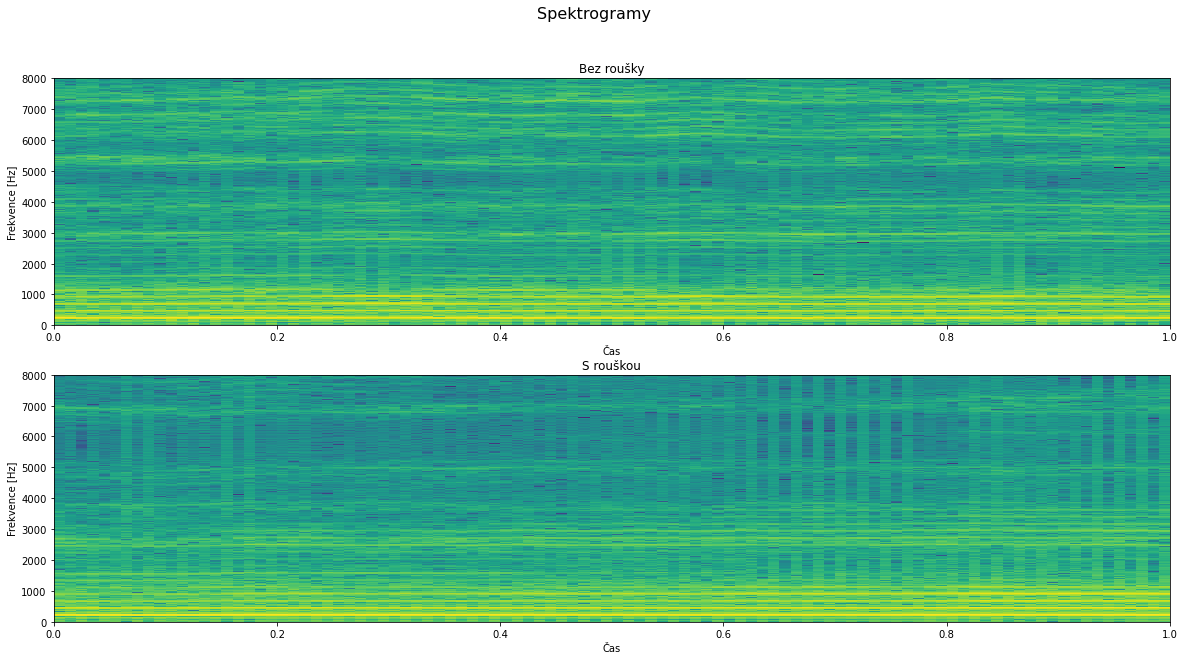

In [17]:
logaritmicky_bez_pulka = np.zeros([100,512])
logaritmicky_s_pulka = np.zeros([100,512])


for i in range(100):
    for j in range(512):
        logaritmicky_bez_pulka[i,j] = logaritmicky_bez[i,j]
        logaritmicky_s_pulka[i,j]   = logaritmicky_s[i,j]

logaritmicky_bez_pulka = np.transpose(logaritmicky_bez_pulka)
logaritmicky_s_pulka   = np.transpose(logaritmicky_s_pulka)   

        
figure_spektrogram = plt.figure(1, figsize=(20,10))
plt.tight_layout(pad=5.4, w_pad=4.5, h_pad=5.0)
figure_spektrogram.suptitle('Spektrogramy', fontsize=16)  
b = figure_spektrogram.add_subplot(211)
s = figure_spektrogram.add_subplot(212)
b.set_title('Bez roušky')
s.set_title('S rouškou')
b.set_ylabel('Frekvence [Hz]')
b.set_xlabel('Čas')
s.set_ylabel('Frekvence [Hz]')
s.set_xlabel('Čas')
b.imshow(logaritmicky_bez_pulka,origin='lower',interpolation='nearest', aspect='auto',extent=[0,1,0,8000])
s.imshow(logaritmicky_s_pulka,origin='lower',interpolation='nearest', aspect='auto',extent=[0,1,0,8000])
plt.show()

In [18]:
S_Hejomega = np.zeros((100,1024),dtype='complex')
Bez_Hejomega = np.zeros((100,1024),dtype='complex')
logaritmicky_bez_pulka = np.zeros([100,512])
logaritmicky_s_pulka = np.zeros([100,512])

V = np.zeros((100,1024))
for i in range(100):
     V[i] = V[i] + abs(spektrum_s[i])/abs(spektrum_bez[i])
        
for i in range(100):
    for j in range(1024):
           logaritmicky_bez[i,j] = 10*math.log10(abs(V[i,j])**2)
                  

for i in range(100):
    for j in range(512):
        logaritmicky_bez_pulka[i,j] = logaritmicky_bez[i,j]
        

logaritmicky_bez_pulka = np.transpose(logaritmicky_bez_pulka)


#abs(DFTmaskon)/abs(DFTmaskof)

#for i in range(100):
 #   freq[i] = abs(scipy.signal.freqz(spektrum_bez[i]))/abs(scipy.signal.freqz(spektrum_s[i]))
 #   freq[i] = abs(freq[i]) /100



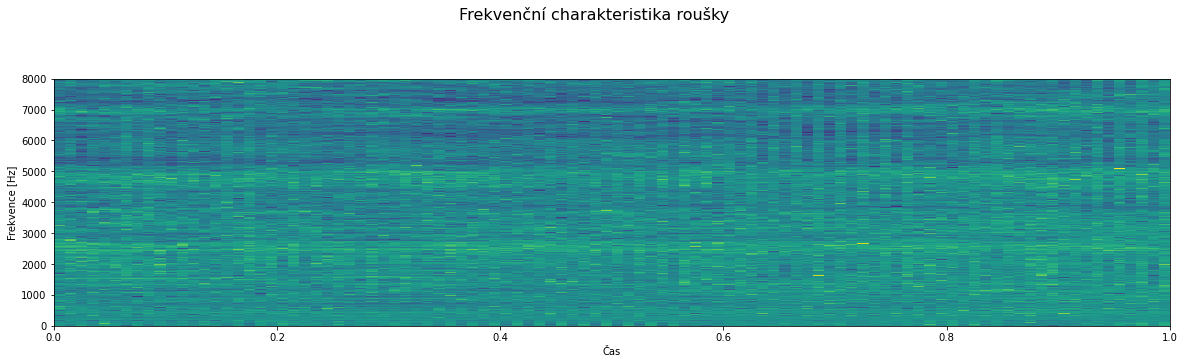

In [19]:
figure_frekv_char = plt.figure(1, figsize=(20,10))
plt.tight_layout(pad=1.4, w_pad=1.5, h_pad=1.0)
figure_frekv_char.suptitle('Frekvenční charakteristika roušky', fontsize=16)  
b = figure_frekv_char.add_subplot(211)
b.set_ylabel('Frekvence [Hz]')
b.set_xlabel('Čas')
b.imshow(logaritmicky_bez_pulka,origin='lower',interpolation='nearest', aspect='auto',extent=[0,1,0,8000])
plt.show()

In [20]:
# DFT pro rousku a DFT bez rousky, potom vydelim onmask/offmask
suma = np.array((100,100),dtype='complex')
W = np.zeros((100,512),dtype='complex')
H = np.zeros((100,512),dtype='complex')
sumaw = np.zeros([512],dtype='complex')
sumah = np.zeros([512],dtype='complex')
prumw = np.zeros([512],dtype='complex')
prumh = np.zeros([512],dtype='complex')

for i in range(100):
    W[i], H[i] = scipy.signal.freqz(spektrum_bez[i],spektrum_s[i])


for j in range(512):
    for i in range(100): 
        sumaw[j] = sumaw[j] + W[i,j]
        sumah[j] = sumah[j] + H[i,j]
        
for j in range(512):
    prumw[j] = sumaw[j]/100
    prumh[j] = sumah[j]/100



#for i in range(100):
#    for j in range(1024):
#        suma[i] = suma[i] + spektrum_bez[i,j]

#print(len(suma))
#print(suma)   
#spektrum_bez
#spektrum_s


/home/janz/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/janz/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


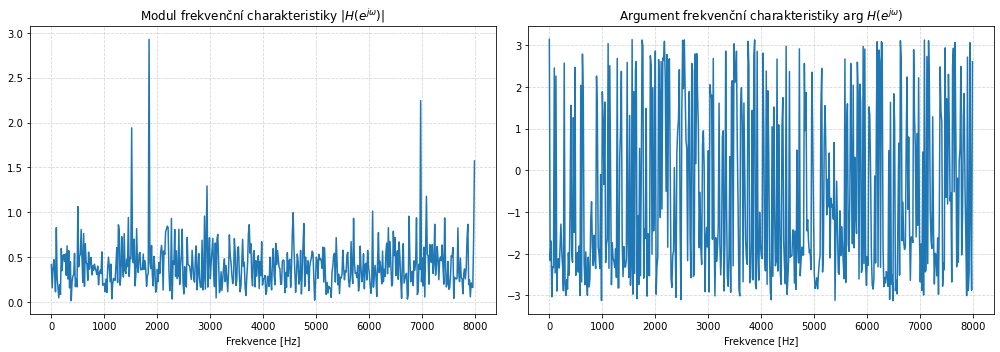

In [21]:
fs = 16000
H = prumh
W = prumw

_, ax = plt.subplots(1, 2, figsize=(14,5))

ax[0].plot(W / 2 / np.pi * fs, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

ax[1].plot(W / 2 / np.pi * fs, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

/home/janz/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


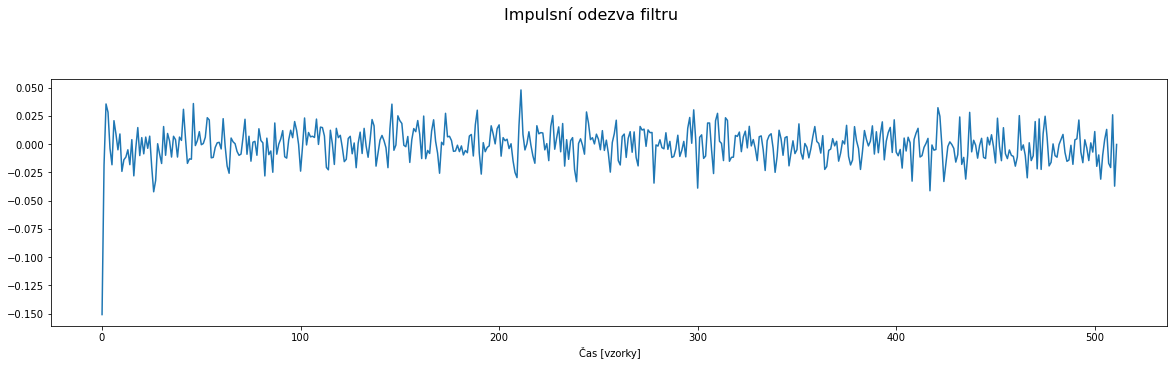

/home/janz/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


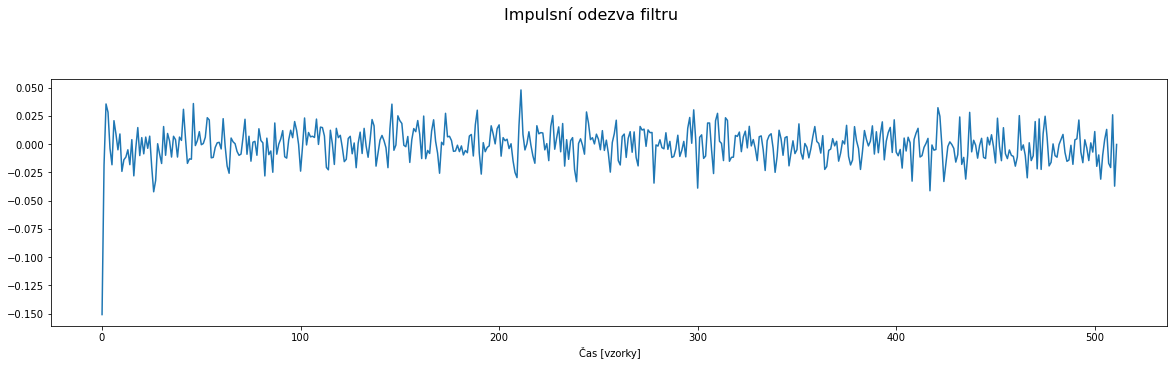

In [22]:
def IDFT_moje_necoblbe(waves):
    pole = np.zeros(512)
    for k in range(0, 512):
        val = 0.0
        for n in range(0, len(waves)):
            # https://dsp.stackexchange.com/a/510/25943
            val += waves[n]*np.exp(1.j * 2*np.pi * n * k / len(waves)) 
        pole[k] = val.real
    return pole

def IDFT_moje(pole):
    N = pole.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * (1/N) * np.pi * k * n )
    return np.dot(M, pole)/N

moje = IDFT_moje(H)
knihovna = np.fft.ifft(H)
#moje = IDFT_druhaverze(H)

figure = plt.figure(1, figsize=(20,10))
plt.tight_layout(pad=0, w_pad=0, h_pad=0.0)
figure.suptitle('Impulsní odezva filtru', fontsize=16)  
b = figure.add_subplot(211)
b.set_xlabel('Čas [vzorky]')
b.plot(moje)
plt.show()

figure = plt.figure(1, figsize=(20,10))
plt.tight_layout(pad=0, w_pad=0, h_pad=0.0)
figure.suptitle('Impulsní odezva filtru', fontsize=16)  
b = figure.add_subplot(211)
b.set_xlabel('Čas [vzorky]')
b.plot(knihovna)
plt.show()

/home/janz/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


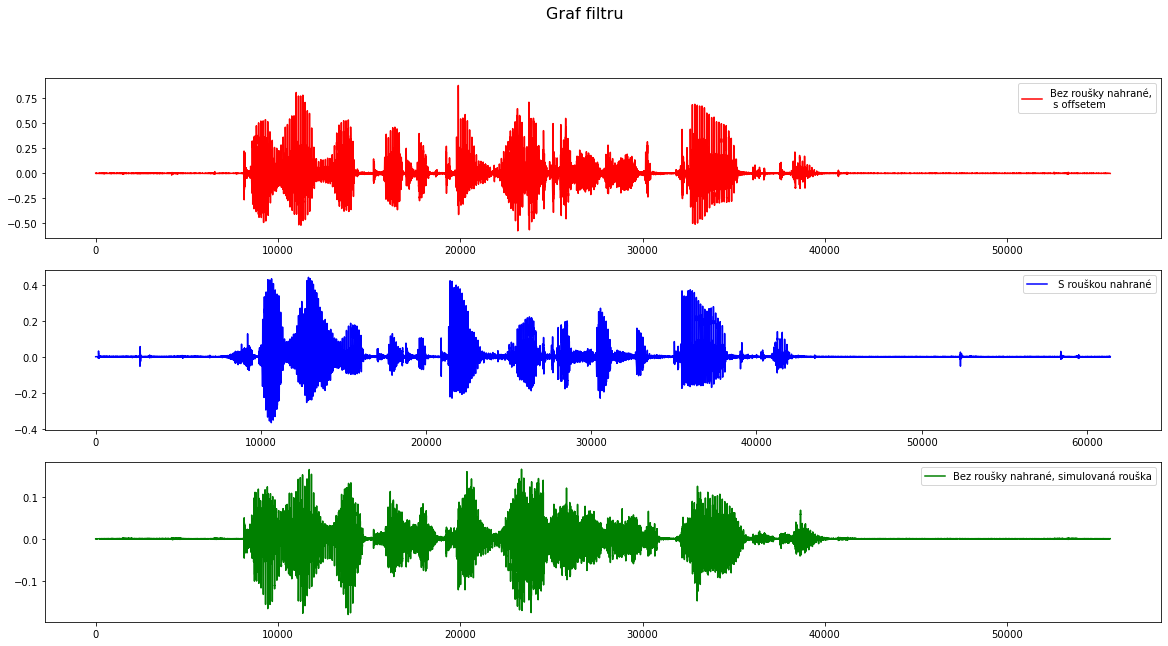

In [26]:
import soundfile as sf

  #nahrani  
veta_bez, s_bez = librosa.load('../audio/maskoff_sentence.wav', 16000, mono = True, offset = 0.12)
veta_s, s_s = librosa.load('../audio/maskon_sentence.wav', 16000, mono = True, offset = 0)

    #simulace
simulace_veta = scipy.signal.lfilter(knihovna, 1, veta_bez, axis=- 1, zi=None)
simulace_ton = scipy.signal.lfilter(knihovna, 1, ton_bez, axis=- 1, zi=None)

    #ulozeni
sf.write('../audio/sim_maskon_sentence.wav', abs(simulace_veta), s_bez)
sf.write('../audio/sim_maskon_tone.wav', abs(simulace_ton), s_bez)

figure = plt.figure(10, figsize=(20,10))
figure.suptitle('Graf filtru', fontsize=16)
figure.tight_layout(pad=3.0)
fig_a = figure.add_subplot(311)
fig_b = figure.add_subplot(312)
fig_c = figure.add_subplot(313)
#fig.set_ylabel('f0 [Hz]')
#fig.set_xlabel('Rámce')
fig_a.plot(veta_bez, color = 'r',label='Bez roušky nahrané,\n s offsetem'); fig_a.legend();
fig_b.plot(veta_s, color = 'b', label=' S rouškou nahrané'); fig_b.legend();
fig_c.plot(simulace_veta, color = 'g', label='Bez roušky nahrané, simulovaná rouška'); fig_c.legend();
plt.show()
